In [ ]:
!pip install keras

In [ ]:
import pandas as pd
import numpy as np
import keras
import tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
def load_data(file_path):
    return pd.read_csv(file_path, sep=';', header=None, names=['text', 'emotion'])

# Load datasets
train_df = load_data('train.txt')
test_df = load_data('test.txt')
val_df = load_data('val.txt')

# Basic Info
def basic_info(df, name):
    print(f"\n{name} DataFrame Info:")
    print(df.info())
    print(f"\n{name} DataFrame Head:")
    print(df.head())
    print(f"\n{name} DataFrame Description:")
    print(df.describe(include='all'))

basic_info(train_df, 'Train')
basic_info(test_df, 'Test')
basic_info(val_df, 'Validation')


Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     16000 non-null  object
 1   emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB
None

Train DataFrame Head:
                                                text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

Train DataFrame Description:
                                                     text emotion
count                                               16000   16000
unique                                              15969       6
top     i feel on the verge of tears from weariness

In [ ]:
val=val_df['emotion'].value_counts(normalize=True)*100
train=train_df['emotion'].value_counts(normalize=True)*100
test=test_df['emotion'].value_counts(normalize=True)*100
print("Validation Percentage Apperance: \n",val)
print("Train Percentage Apperance: \n",val)
print("Test Percentage Apperance: \n",val)

Validation Percentage Apperance: 
 emotion
joy         35.20
sadness     27.50
anger       13.75
fear        10.60
love         8.90
surprise     4.05
Name: proportion, dtype: float64
Train Percentage Apperance: 
 emotion
joy         35.20
sadness     27.50
anger       13.75
fear        10.60
love         8.90
surprise     4.05
Name: proportion, dtype: float64
Test Percentage Apperance: 
 emotion
joy         35.20
sadness     27.50
anger       13.75
fear        10.60
love         8.90
surprise     4.05
Name: proportion, dtype: float64


In [ ]:
val_df['text_length'] = val_df['text'].apply(len)
idx_max_length = val_df['text_length'].idxmax()
emo = val_df.loc[idx_max_length, 'emotion']
txt = val_df.loc[idx_max_length, 'text']
print('the text is: ' + txt)
print('the emotion is: ' + emo)

the text is: i couldnt hellip even when it made my heart ache to simply look at you hellip because i loved you so much and i knew you would never return my feelings hellip and i couldnt bring myself to hate you for the idiotic stunt you pulled in the other room either though i do ask that you dont repeat it
the emotion is: sadness


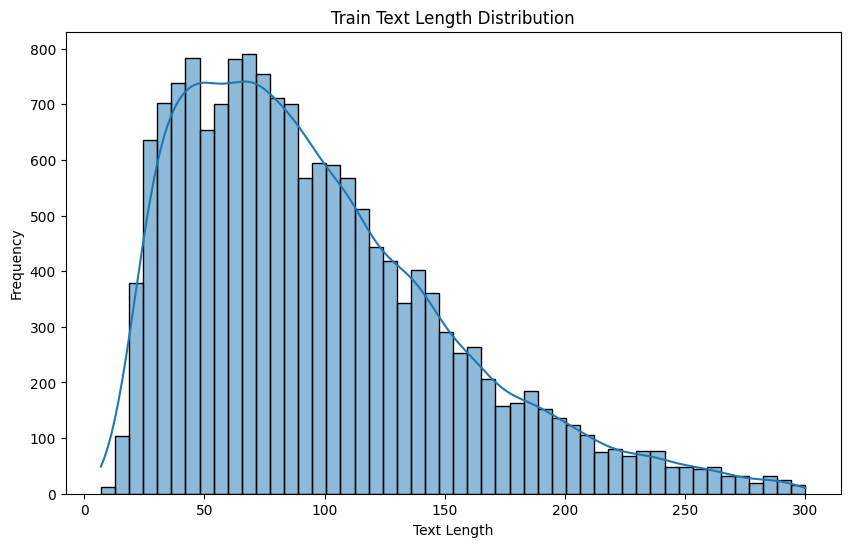

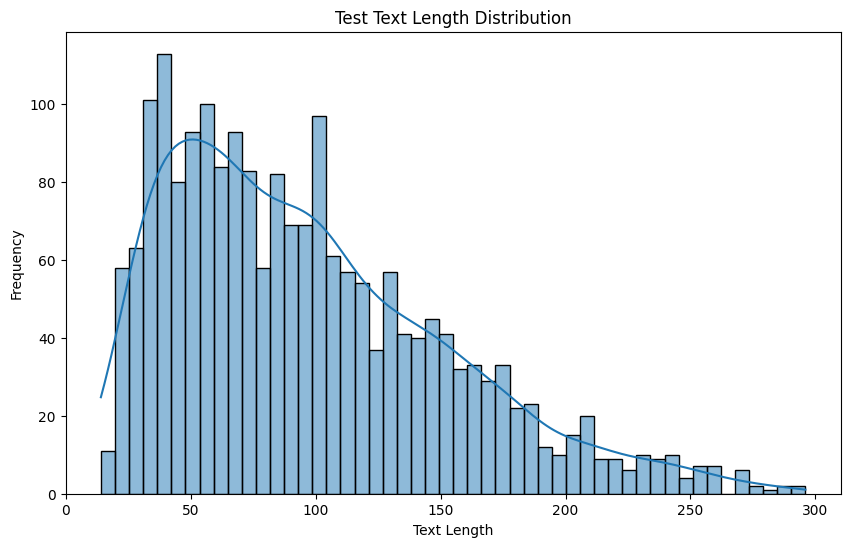

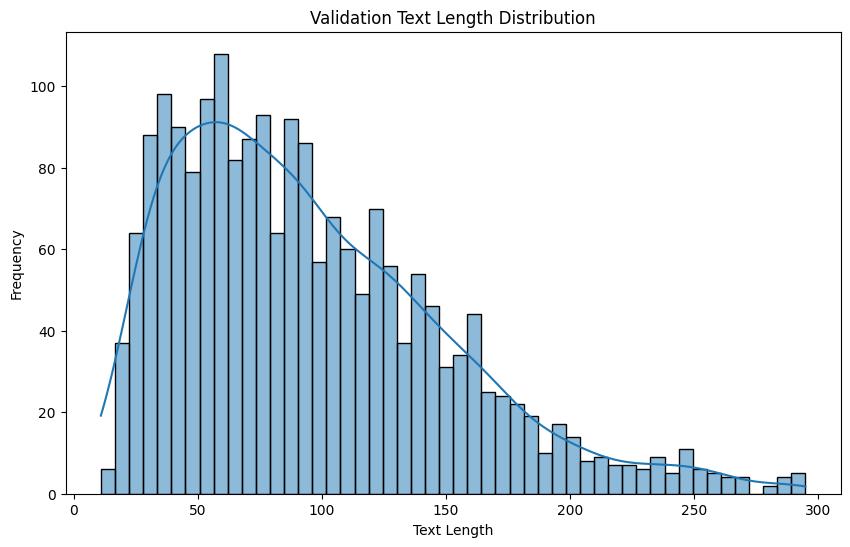

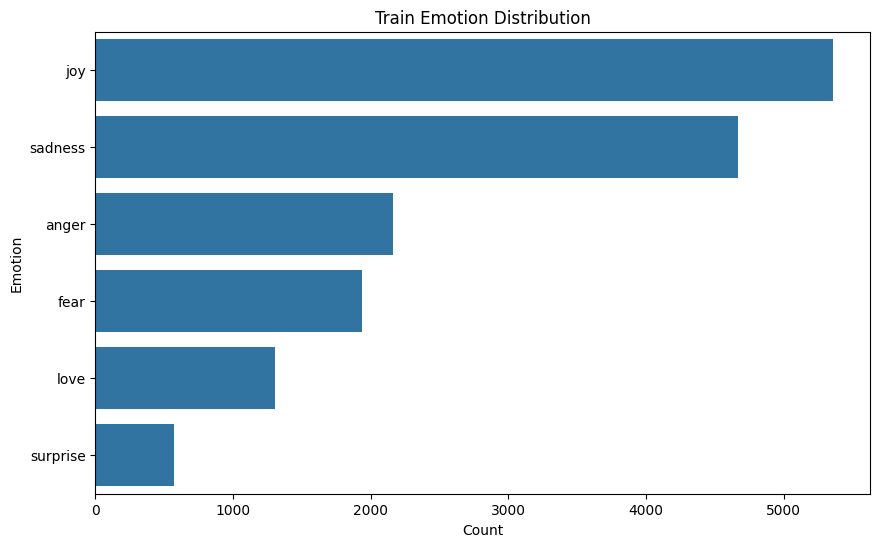

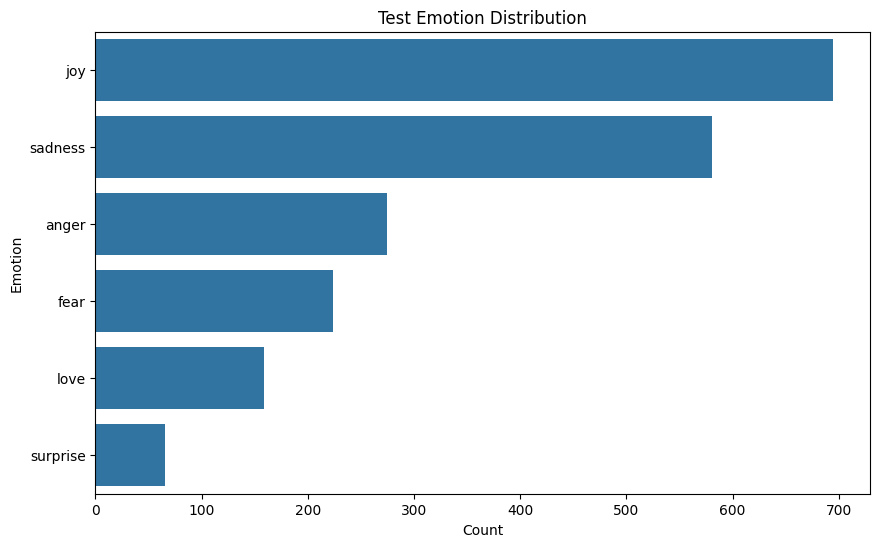

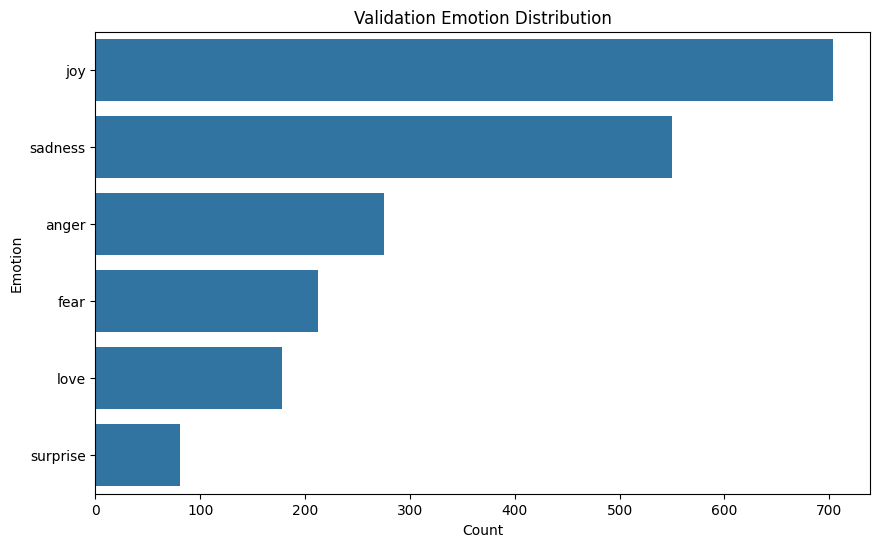

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Text length distribution
def plot_text_length_distribution(df, name):
    df['text_length'] = df['text'].apply(len)
    plt.figure(figsize=(10, 6))
    sns.histplot(df['text_length'], bins=50, kde=True)
    plt.title(f'{name} Text Length Distribution')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

# Emotion distribution
def plot_emotion_distribution(df, name):
    plt.figure(figsize=(10, 6))
    sns.countplot(y='emotion', data=df, order=df['emotion'].value_counts().index)
    plt.title(f'{name} Emotion Distribution')
    plt.xlabel('Count')
    plt.ylabel('Emotion')
    plt.show()

plot_text_length_distribution(train_df, 'Train')
plot_text_length_distribution(test_df, 'Test')
plot_text_length_distribution(val_df, 'Validation')

plot_emotion_distribution(train_df, 'Train')
plot_emotion_distribution(test_df, 'Test')
plot_emotion_distribution(val_df, 'Validation')

In [ ]:
train_df

,text,emotion,text_length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Preprocessing
train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)
val_df['text'] = val_df['text'].apply(preprocess_text)

# Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])
X_val = vectorizer.transform(val_df['text'])

# Encode emotions
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['emotion'])
y_test = label_encoder.transform(test_df['emotion'])
y_val = label_encoder.transform(val_df['emotion'])


In [ ]:
train_df.head()

,text,emotion,text_length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Split training data
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_split, y_train_split)
    y_pred_train = model.predict(X_train_split)
    y_pred_val = model.predict(X_val_split)

    print(f"\n{name} Performance:")
    print("Train Accuracy:", accuracy_score(y_train_split, y_pred_train))
    print("Validation Accuracy:", accuracy_score(y_val_split, y_pred_val))
    print("Validation Classification Report:\n", classification_report(y_val_split, y_pred_val, target_names=label_encoder.classes_))




Naive Bayes Performance:
Train Accuracy: 0.751953125
Validation Accuracy: 0.660625
Validation Classification Report:
               precision    recall  f1-score   support

       anger       0.92      0.30      0.46       427
        fear       0.94      0.23      0.37       397
         joy       0.60      0.98      0.74      1021
        love       1.00      0.03      0.07       296
     sadness       0.69      0.93      0.79       946
    surprise       0.00      0.00      0.00       113

    accuracy                           0.66      3200
   macro avg       0.69      0.41      0.40      3200
weighted avg       0.73      0.66      0.58      3200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Support Vector Machine Performance:
Train Accuracy: 0.991171875
Validation Accuracy: 0.841875
Validation Classification Report:
               precision    recall  f1-score   support

       anger       0.92      0.79      0.85       427
        fear       0.86      0.74      0.80       397
         joy       0.76      0.96      0.85      1021
        love       0.89      0.51      0.65       296
     sadness       0.91      0.92      0.91       946
    surprise       0.83      0.49      0.61       113

    accuracy                           0.84      3200
   macro avg       0.86      0.74      0.78      3200
weighted avg       0.85      0.84      0.84      3200


Logistic Regression Performance:
Train Accuracy: 0.94765625
Validation Accuracy: 0.8553125
Validation Classification Report:
               precision    recall  f1-score   support

       anger       0.90      0.80      0.85       427
        fear       0.86      0.75      0.80       397
         joy       0.80      0.97    

In [ ]:
# Train the final model on the full training set
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_test = final_model.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))



Test Accuracy: 0.867
Test Classification Report:
               precision    recall  f1-score   support

       anger       0.89      0.81      0.85       275
        fear       0.87      0.81      0.84       224
         joy       0.85      0.95      0.89       695
        love       0.78      0.64      0.70       159
     sadness       0.90      0.92      0.91       581
    surprise       0.92      0.50      0.65        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.81      2000
weighted avg       0.87      0.87      0.86      2000



In [ ]:
def predict_emotion(texts, model, vectorizer, label_encoder):
    texts = [preprocess_text(text) for text in texts]
    X_new = vectorizer.transform(texts)
    predictions = model.predict(X_new)
    return label_encoder.inverse_transform(predictions)

# Example predictions
new_texts = ["I am feeling helpless!"]
predicted_emotions = predict_emotion(new_texts, final_model, vectorizer, label_encoder)
print("\nPredicted Emotions for New Texts:", predicted_emotions)



Predicted Emotions for New Texts: ['fear']
